In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, Input, BatchNormalization, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

In [3]:
#Загрузка данных
images = np.load('./data/images.npy')
labels = np.load('./data/labels.npy')

In [4]:
print('В массиве пустых изображений', 'нет' if bool(np.isnan(images).any()) == False else 'есть')
print('В массиве пустых загловков', 'нет' if bool(np.isnan(labels).any()) == False else 'есть')

В массиве пустых изображений нет
В массиве пустых загловков нет


# Анализ данных

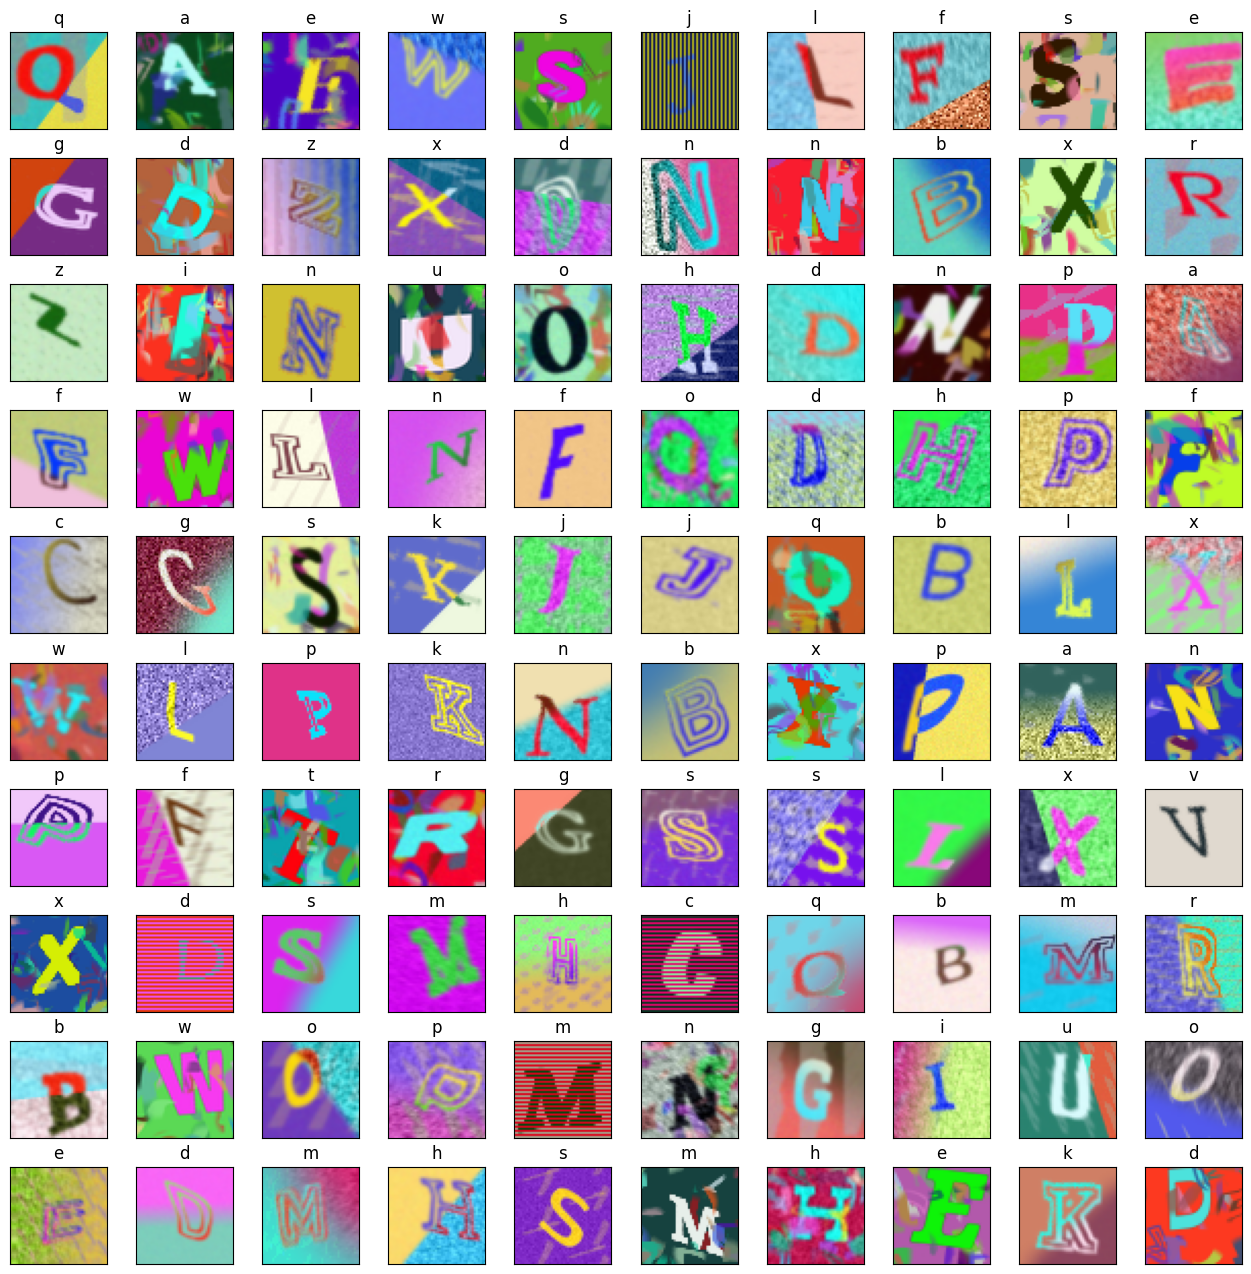

In [5]:
# Визуализация 100 случайных изображений из датасета
numwords = {num: letter for num, letter in
                enumerate("abcdefghijklmnopqrstuvwxyz")}

plt.figure(figsize=(16, 16))
n=1
for i in np.random.randint(0, len(images), size=100):
    plt.subplot(10, 10, n) # Делим фигуру на 100 частей
    # Настройка для красивого отображения
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])
    label_index = int(labels[i])
    plt.title(numwords[label_index])
    plt.subplots_adjust(hspace=0.3)
    n+=1
plt.show()

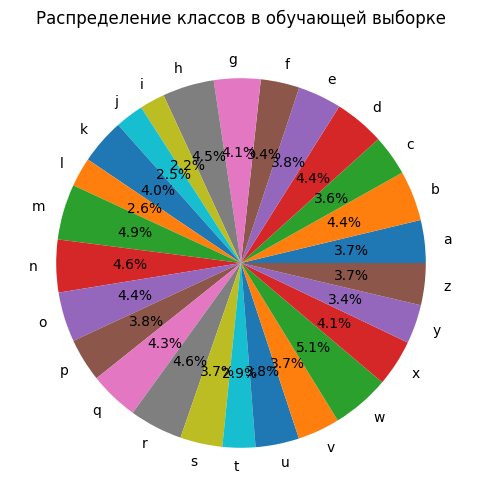

In [6]:
# Строим диаграмму распределения классов в обучающей выборке
plt.figure(figsize=(10, 6))
plt.pie(np.unique(labels, return_counts=True)[1], 
        labels=[numwords[i] for i in np.unique(labels, return_counts=True)[0]], 
        autopct='%1.1f%%')
plt.title('Распределение классов в обучающей выборке')
plt.show()

Видим, что классы достаточно сбалансированы (во всяком случае нет класса, который нуждался бы в undersampling-е)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train.shape

(16000, 48, 48, 3)

In [ ]:
model = Sequential([
    Input(shape=(48, 48, 3)),# входной слой на нужное разрешение изображения

    # Строим модель 
    Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),  # Увеличиваем число фильтров
    BatchNormalization(),  # добавляем слои нормализации
    MaxPooling2D(pool_size=(2, 2)),  # Уменьшаем размерность
    Dropout(0.25),  # Добавляем слой Dropout (меньше для того, чтобы не нарушать связность сети)
    
    # Второй блок из тех же слоев
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),  # Больше фильтров
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Третий блок из тех же слоев
    Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Четвертый блок из тех же слоев
    Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Выходной слой
    Flatten(),
    Dense(256, activation='relu'),  # Увеличиваем число нейронов
    BatchNormalization(),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, y_test),  # или validation_split=0.2
    callbacks=[early_stop]
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 50ms/step - accuracy: 0.0468 - loss: 4.0556 - val_accuracy: 0.0698 - val_loss: 3.3577
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.0834 - loss: 3.3716 - val_accuracy: 0.3315 - val_loss: 2.2433
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.3645 - loss: 2.1229 - val_accuracy: 0.6550 - val_loss: 1.1776
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.5892 - loss: 1.3357 - val_accuracy: 0.7325 - val_loss: 0.8726
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.6929 - loss: 0.9896 - val_accuracy: 0.7462 - val_loss: 0.8189
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.7383 - loss: 0.8301 - val_accuracy: 0.8117 - val_loss: 0.5973
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.7609 - loss: 0.7358 - val_accuracy: 0.8415 - val_loss: 0.5140
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.7934 - loss: 0.6414 - 

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

Test loss: 0.32659921050071716
Test accuracy: 0.8995000123977661


После построение удовлетворительной модели (которая не особо отличается от прошлой задачи) прогнозируем результат

In [12]:
images_validate = np.load('./data/images_sub.npy')

predictions = model.predict(images_validate)
classes = np.argmax(predictions, axis=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step


In [13]:
pd.DataFrame(classes, columns=['Category']).to_csv('results.csv')

Leaderboard на Kaggle
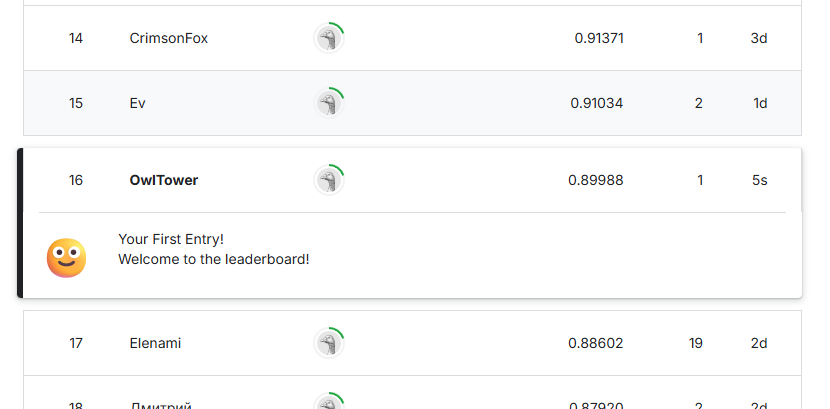